<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Crop_Recomandation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Recommendation

Content

    Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy.

Data fields

    N - ratio of Nitrogen content in soil
    P - ratio of Phosphorous content in soil
    K - ratio of Potassium content in soil
    temperature - temperature in degree Celsius
    humidity - relative humidity in %
    ph - ph value of the soil
    rainfall - rainfall in mm

In [1]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd

import random
import math
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve 
import seaborn as sns   # For Correlation 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [4]:
dataset = pd.read_csv('Crop_recommendation.csv')

In [5]:
dataset.shape

(2200, 9)

In [6]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label_numeric
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [7]:
corr = dataset.corr()
print(corr)

                      N         P         K  ...        ph  rainfall  label_numeric
N              1.000000 -0.231460 -0.140512  ...  0.096683  0.059020       0.282787
P             -0.231460  1.000000  0.736232  ... -0.138019 -0.063839      -0.167951
K             -0.140512  0.736232  1.000000  ... -0.169503 -0.053461       0.143703
temperature    0.026504 -0.127541 -0.160387  ... -0.017795 -0.030084       0.180571
humidity       0.190688 -0.118734  0.190859  ... -0.008483  0.094423       0.524452
ph             0.096683 -0.138019 -0.169503  ...  1.000000 -0.109069       0.052389
rainfall       0.059020 -0.063839 -0.053461  ... -0.109069  1.000000       0.121486
label_numeric  0.282787 -0.167951  0.143703  ...  0.052389  0.121486       1.000000

[8 rows x 8 columns]


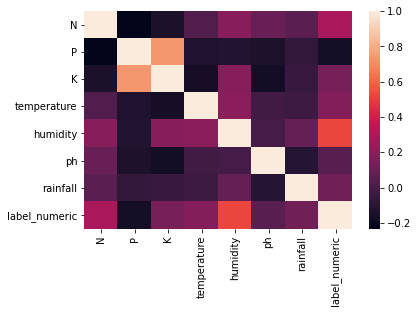

In [8]:
sns.heatmap(corr)

In [9]:
# split data into two parts training and testing 
train_set = dataset.sample(frac=0.80,random_state=0)
test_set = dataset.drop(train_set.index)

In [10]:
print(train_set.shape)
print(test_set.shape)

(1760, 9)
(440, 9)


In [11]:
#bifurgate in feature and target
train_set_feature = train_set.iloc[:,0:7].values
train_set_target = train_set.iloc[:,-2:-1].values
test_set_feature = test_set.iloc[:,0:7].values
test_set_target = test_set.iloc[:,-2:-1].values

data_feature = dataset.iloc[:,0:7].values
data_target = dataset.iloc[:,-2:-1].values

In [12]:
train_set_target = train_set_target.reshape(1760,)

In [13]:
# It will give precision,recall,f1-score,support for each class
#macro average : averaging the unweighted mean per label
#weighted average : averaging the support-weighted mean per label
def make_report(y_actual,y_pred):
    confusionMatrix=confusion_matrix(y_actual, y_pred, labels=[i for i in range(22)])
    report = classification_report(y_actual, y_pred)
    print(report)
    

In [14]:
def find_accuracy(target,prediction,no_of_class_prediction,no_of_class_target):
    lst_prediction=[]
    Dict={}
    for i in range(no_of_class_prediction):
        lst_prediction.append(np.where(prediction == i))
    for i in range(no_of_class_target):
        lst_target = np.where(target == i)
        count = -1
        ind =-1
        for j in range(len(lst_prediction)):
            intersection = len(np.intersect1d(lst_target,lst_prediction[j]))
            union = len(np.union1d(lst_target,lst_prediction[j]))
            if((intersection/union)>count):
                ind = j
                count=(intersection/union)
        Dict[i]=ind
    count=0
    count_1=0
    target_report =[]
    for i in range(len(target)):
        
        if(prediction[i]==Dict[target[i][0]]):
            count+=1  
    
    return count/len(target)


In [15]:
print(train_set_feature.shape)
print(train_set_target.shape)
print(test_set_feature.shape)
print(test_set_target.shape)

(1760, 7)
(1760,)
(440, 7)
(440, 1)


# K -Nearest Neighbors

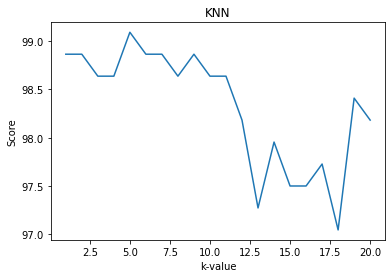

[98.86363636363636, 98.86363636363636, 98.63636363636363, 98.63636363636363, 99.0909090909091, 98.86363636363636, 98.86363636363636, 98.63636363636363, 98.86363636363636, 98.63636363636363, 98.63636363636363, 98.18181818181819, 97.27272727272728, 97.95454545454545, 97.5, 97.5, 97.72727272727273, 97.04545454545455, 98.4090909090909, 98.18181818181819]


In [16]:
score=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    model.fit(train_set_feature,train_set_target)
    prediction = model.predict(test_set_feature)
    score.append(model.score(test_set_feature, test_set_target) * 100)
x=np.arange(1,21,step=1)
plt.plot(x,score)
plt.title('KNN')
plt.xlabel('k-value')
plt.ylabel('Score')
plt.show()
print(score)

In [17]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform')
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)
score = model.score(test_set_feature, test_set_target) * 100
print(score)

99.0909090909091


In [18]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        16
           5       1.00      0.95      0.97        20
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.96      1.00      0.98        27
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        20
          17       1.00    

# Random Forest

In [19]:
model = RandomForestClassifier(n_estimators=1000,random_state=0)
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)

print(model.score(test_set_feature, test_set_target) * 100)

99.77272727272727


In [20]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        20
          17       1.00    

In [21]:
#Here in Supervised Machine learning algorithm we get accuracy as
# K-nearest neighbour = 99.09
# Random Forest = 99.77
# So from this  we can say that Random Forest is more advisable compare to KNN

# KMeans

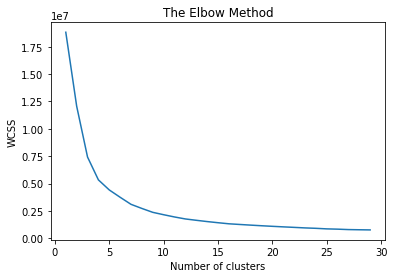

In [22]:
wcss=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data_feature)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,30),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#in data there are 22 class but according to elbow method 10 is good for k soIi have take k as 10
kmeans=KMeans(n_clusters=10,init='k-means++',random_state=0)
prediction=kmeans.fit_predict(data_feature)
print(find_accuracy(data_target,prediction,10,22))

0.8881818181818182


# Hierarchical Clustering

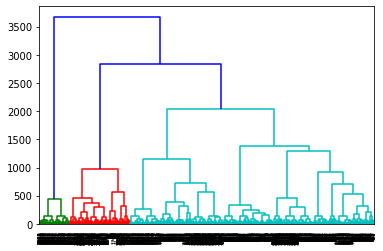

In [24]:
dendogram = sch.dendrogram(sch.linkage(data_feature,method='ward'))

In [25]:
cluster= 22
hc = AgglomerativeClustering(n_clusters=cluster,affinity ='euclidean', linkage = 'ward')
prediction = hc.fit_predict(data_feature)
print(find_accuracy(data_target,prediction,cluster,22))

0.8613636363636363


# DBSCAN

In [26]:
data_feature_standard = StandardScaler().fit_transform(data_feature)

In [27]:
nearesneighvour=NearestNeighbors(3).fit(data_feature_standard)

In [28]:
distances,indices = nearesneighvour.kneighbors(data_feature_standard)

In [29]:
distanceDec = sorted(distances[:,2],reverse=True)

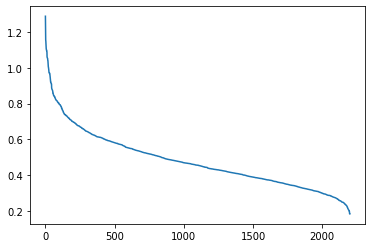

In [30]:
plt.plot(indices[:,0],distanceDec)

In [31]:
db = DBSCAN(eps=0.7,min_samples=3).fit(data_feature_standard)
labels = db.labels_

In [32]:
core_sample_mask=np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_]=True

In [33]:
core_sample_mask

array([ True,  True, False, ...,  True,  True,  True])

In [34]:
prediction = db.fit_predict(data_feature_standard)

In [35]:
unique_labels = set(prediction)

print(find_accuracy(data_target,prediction,len(unique_labels),22))

0.8481818181818181


In [36]:
# If we see accuracy in unsupervised Machine Learning algorithm we get as
# K-Means = 0.888
# Hierarchical = 0.861
# DBSCAN = 0.848
# So from this  we can say that K-Means is more advisable compare to Hierarchical and DBSCAN